# ห้ามลบ

- ในหน้านี้พลเป็นคนทำ
- ควรแก้ ในการยิง API ผมได้ใส่ parametor link ให้คุณเอา link สับย่อยมาใส่

##สิ่งที่แก้ไข

1.ทำการลดการ import

2.ลบหรือยุบตัวแปรที่ไม่ได้ใช้ออกเพื่อให้เข้าใจง่าย

3.เปลี่ยนแปลง API  ให้สามารถส่งลิ้งก์มาด้วย

4.ได้ทำการเปลี่ยน nan เป็น "" หรือ 0 สำเร็จแล้ว

5.uri_API  เพิ่มเส้น APi ไว้ด้านบนใต้ import เพื่อให้ง่ายในการแก้ไข

In [1]:
import requests,pandas as pd
uri_API = ''
data_link_for_lazada  = {
    0: 'อุปกรณ์-อิเล็กทรอนิกส์',
    1: 'อุปกรณ์เสริม-อิเล็กทรอนิกส์', 
    2: 'ทีวีและเครื่องใช้ในบ้าน', 
    3: 'สุขภาพและความงาม', 
    4: 'ทารกและของเล่น', 
    5: 'ของชำและสัตว์เลี้ยง', 
    6: 'บ้านและไลฟ์สไตล์', 
    7: 'แฟชั่นและเครื่องประดับผู้หญิง', 
    8: 'แฟชั่นและเครื่องประดับผู้ชาย',
    9: 'กีฬาและการเดินทาง',
    10: 'ยานยนต์และรถจักรยานยนต์'
    }
# head_excel
header = ['_95X4G href', 'jBwCF src', 'jBwCF src 2','RfADt', 'ooOxS','_1cEkb', 'qzqFw', 'oa6ri']
header_Values = {
    '_95X4G href':"product",
    'jBwCF src':"image_product_1",
    'jBwCF src 2':"image_product_2",
    'IcOsH':"discount",
    'RfADt':"data_product", 
    'ooOxS':"price_product",
    '_1cEkb':"sold",
    'qzqFw':"count_review", 
    'oa6ri':"place"
}

In [2]:
def postAPI_DB(data,id_shop,title_group,i1,link):
    """
    data: text ที่ทำการ += ในตัวแปร success_data_text
    id_shop : shop1_1_1
    title_group:หมวดหมู่กลุ่ม
    i1:กลุ่มหลัก 1 
    link: link หมวดหลัก
    """
    try:
        response = requests.post(
            f"{uri_API}/addb?id={id_shop}&&web=lazada&&group={i1}&&title_group={title_group}&&link={link}",
            headers={
                "Content-type":"application/x-www-form-urlencoded"
            },
            data={
                "data":data
            }
        )
        return {"status":200,"message":"POST API SUCCESS."}
    except:
        return {"status":404,"message":"POST API ERROR."}

กรุงเทพมหานคร
มหาสารคาม
ปราจีนบุรี
กรุงเทพมหานคร
นนทบุรี
มหาสารคาม
กรุงเทพมหานคร
กรุงเทพมหานคร
สงขลา
นนทบุรี
ปทุมธานี
นนทบุรี
พระนครศรีอยุธยา
ต่างประเทศ
กรุงเทพมหานคร
นนทบุรี
นครศรีธรรมราช
กรุงเทพมหานคร
นนทบุรี
ชลบุรี
ต่างประเทศ
กรุงเทพมหานคร
ต่างประเทศ
มหาสารคาม
กรุงเทพมหานคร
กรุงเทพมหานคร
เลย
สมุทรปราการ
ร้อยเอ็ด
นครศรีธรรมราช
สตูล
กรุงเทพมหานคร
ลำปาง
ปทุมธานี
กรุงเทพมหานคร
สมุทรปราการ
กรุงเทพมหานคร
กรุงเทพมหานคร
กรุงเทพมหานคร
กรุงเทพมหานคร
APRODUCT:::maket:::lazada, group:::อุปกรณ์-อิเล็กทรอนิกส์, product:::https://www.lazada.co.th/products/partner-ip-xr-64128-i5034242914.html?spm=a2o4m.searchlistcategory.list.1.906a51eeRXN59H, price_product_2:::, price_product_1:::8900.0, image_product_1:::https://lzd-img-global.slatic.net/g/ff/kf/Sc5700f59d7f64e19b968c7180650a4a2i.jpg_200x200q80.jpg_.webp, discount:::[], image_product_2:::nan, data_product:::Partner ip XR 64/128 เครื่องใหม่ประกันร้าน, price_before:::, Emoji:::, sold:::0, place:::กรุงเทพมหานคร, Recommended_shops:::, count_review:::
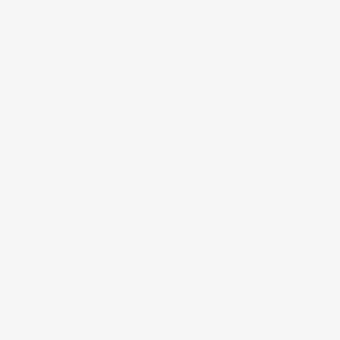
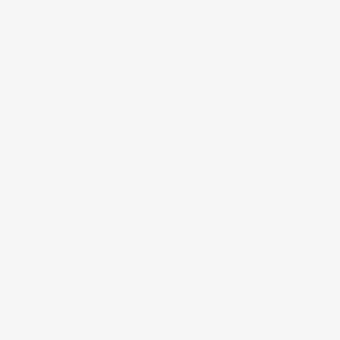
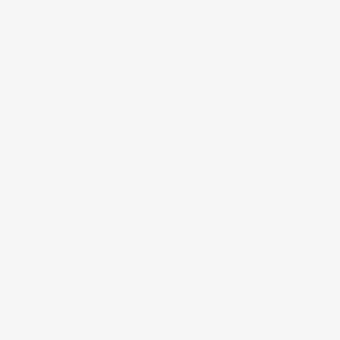
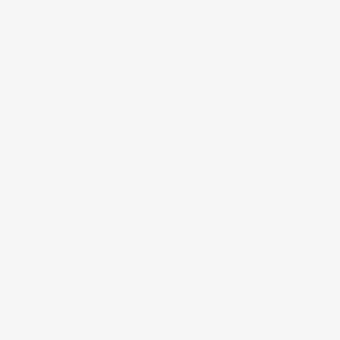
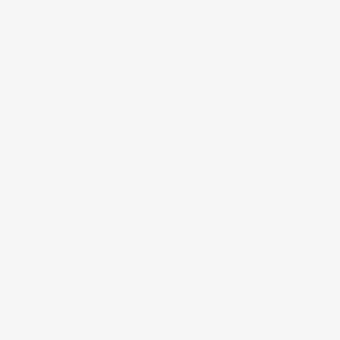
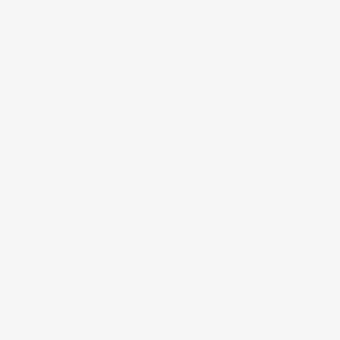
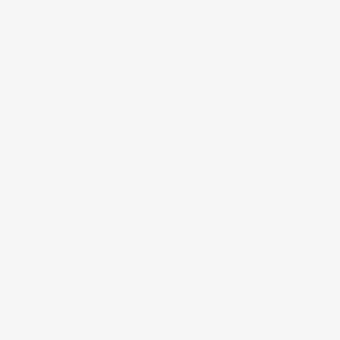
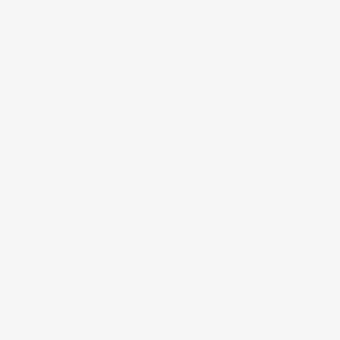
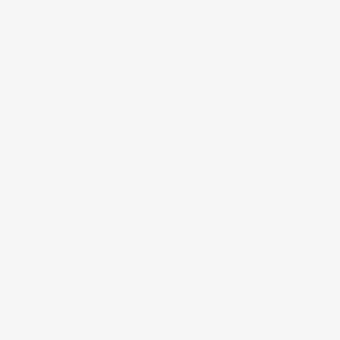
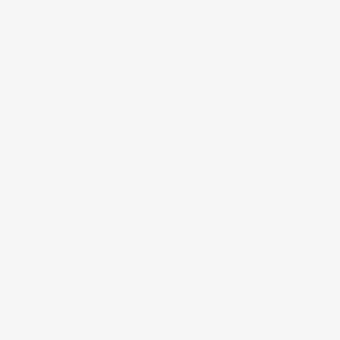
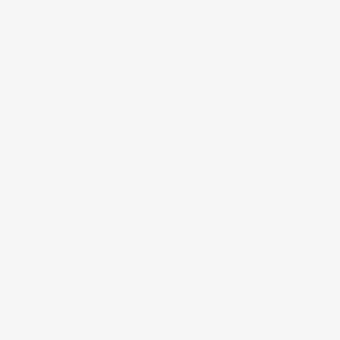
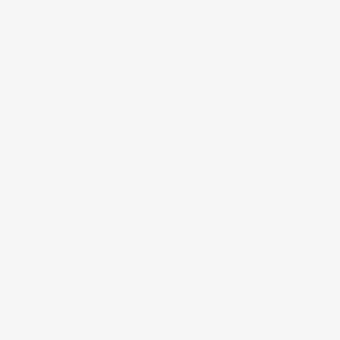
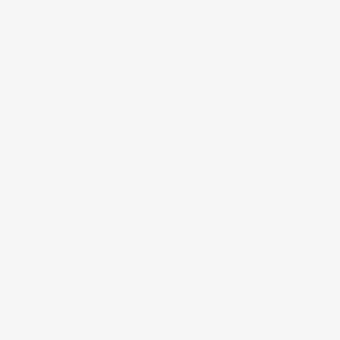
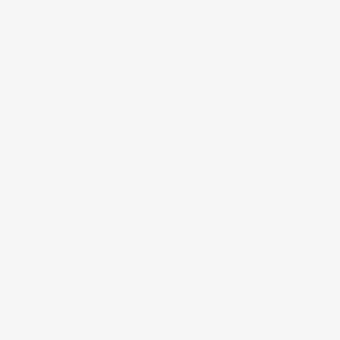
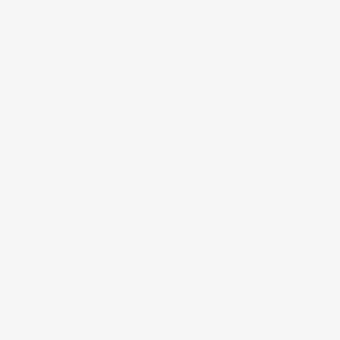
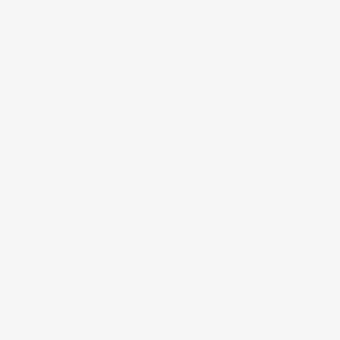

In [3]:
from data_address import address as ad


def data_process(path_file,i1,i2,i3,group,link):
    """
    Process : เพื่อจัดตำแหน่งข้อมูลให้สามารถป้อนเข้า Data Base ได้
    Args:
        path_file: ไฟล์ข้อมูล excel ที่โหลดมาด้วยโปเกบอล อ่านเพื่อแปลงข้อมูลเป็น json
        i1: รอบการทำงานใหญ่ที่สุด ก็คือ หมวดหมู่
        i2: รอบการทำงานกลาง ก็คือ หมวดหมู่ สับย่อยลงมา
        i3: รอบการทำงานเล็กสุด ก็คือ หน้าแต่ละหน้าของสับย่อย ที่เราให้ไปอ่านแล้วกดโหลด
        group: _description_
    """
    try:
        read_excel = pd.read_excel(path_file);
        num_rows, num_columns = read_excel.shape
        success_data_text = ""
        for i in range(num_rows):
            data_process = {
                "product":[],
                "price_product_2":[],
                "price_product_1":[],
                "image_product_1":[],
                "discount":[],
                "image_product_2":[],
                "data_product":[],
                "price_before":[],
                "Emoji":[],
                "sold":[],
                "place":[],
                "Recommended_shops":[],
                "count_review":[],
                "maket":[],
                "group":[]
            }
            data = "Product_"+str(i+1);
            for j in range(len(header)):
                data_input = str(read_excel[header[j]][i]);
                data_process[header_Values[header[j]]]=data_input;
            # ****************************************************************
            Product = {}
            Product[data]= data_process
            Product[data]["maket"]="lazada"
            Product[data]["group"]=group
            id_shop = f'shop{i1}_{i2}_{i3}'
            # ****************************************************************
            product = Product[data]["product"]
            image_product_1 = Product[data]["image_product_1"]
            image_product_2 = Product[data]["image_product_2"]
            discount = Product[data]["discount"]
            data_product = Product[data]["data_product"]
            price_product = float(Product[data]["price_product"].replace("฿","").replace(",",""))
            price_product = (price_product<=0)and "0" or price_product
            sold = (Product[data]["sold"].split(" ")[0]=="nan")and "0" or type(Product[data]["sold"].split(" ")[0] )
            address = (Product[data]["place"]=='nan')and "" or ad[Product[data]["place"]]
            count_review = (Product[data]["count_review"]=="nan")and "0" or Product[data]["count_review"]
            maket = Product[data]["maket"]
            print(address);
            # ****************************************************************
            success_data_text += f'APRODUCT:::maket:::{maket}, group:::{group}, product:::{product}, price_product_2:::{""}, price_product_1:::{price_product}, image_product_1:::{image_product_1}, discount:::{discount}, image_product_2:::{image_product_2}, data_product:::{data_product}, price_before:::{""}, Emoji:::{""}, sold:::{sold}, place:::{address}, Recommended_shops:::{""}, count_review:::{count_review}'
            # ถ้าข้อมูลครบ 60 ค่อยบันทึก .json และส่ง API
            if(i==num_rows-1):
                link = ""
                print(success_data_text)
                # print(postAPI_DB(success_data_text,id_shop,group,i1,link));
    except Exception as e:
        print(f"data_process : error ==> i1:{i1}, i2:{i2}, i3:{i3}")
        print(e);
data_process('../Bot_lazada/Data_lazada_test_api/data_1_1_100.xlsx',1,1,1,'อุปกรณ์-อิเล็กทรอนิกส์',"")

In [ ]:
from Province import provinces as gi
print("{")
for i in range(len(gi)):
    key = gi[i][1];
    value = gi[i][0]
    print("'%s':'%s',"%(key,value));
print("}")